In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
print("x_train:", x_train.shape, "y_train:", y_train.shape )

x_train: (50000, 32, 32, 3) y_train: (50000, 10)


In [6]:
model = Sequential()

In [8]:
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [9]:
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [10]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,778 (862.41 KB)

 Trainable params: 220,778 (862.41 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,
    validation_data=(x_test, y_test),
    shuffle=True
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.3398 - loss: 1.7503 - val_accuracy: 0.5001 - val_loss: 1.3755
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.5120 - loss: 1.3444 - val_accuracy: 0.5940 - val_loss: 1.1412
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.5734 - loss: 1.1900 - val_accuracy: 0.6304 - val_loss: 1.0396
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6132 - loss: 1.0944 - val_accuracy: 0.6565 - val_loss: 0.9748
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6367 - loss: 1.0258 - val_accuracy: 0.6835 - val_loss: 0.9006
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6557 - loss: 0.9756 - val_accuracy: 0.6902 - val_loss: 0.8760
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.6737 - loss: 0.9273 - val_accuracy: 0.7026 - val_loss: 0.8444
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6888 - loss: 0.8942 - 

# Plot Training Curves

In [ ]:
Plot Accuracy

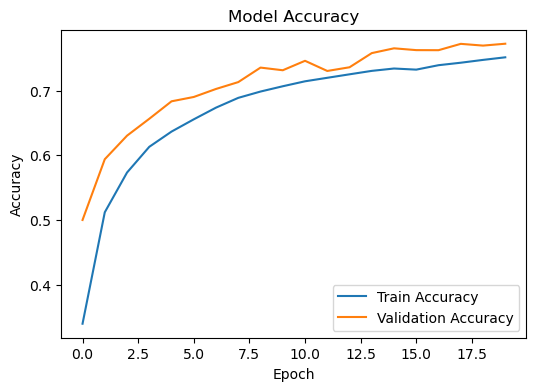

In [14]:
plt.figure(figsize = (6,4))
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

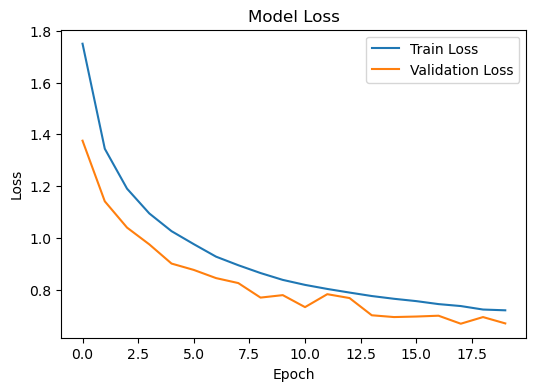

In [15]:
plt.figure(figsize = (6,4))
plt.plot(history.history['loss'], label= "Train Loss")
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

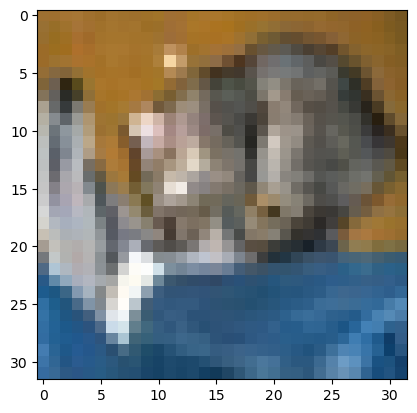

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Prediction: Cat (65.0%)


In [16]:
class_labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

img = x_test[0]
plt.imshow(img)
plt.show()

img_array = np.expand_dims(img, axis=0)

pred = model.predict(img_array)
class_index = int(np.argmax(pred[0]))
confidence = pred[0][class_index]

print(f"Prediction: {class_labels[class_index]} ({confidence*100:.1f}%)")

KeyboardInterrupt: 

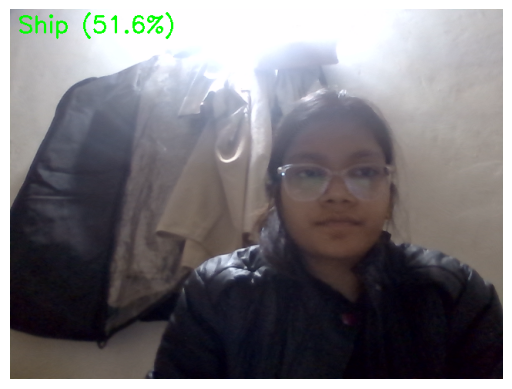

In [23]:
from IPython.display import display, clear_output

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize & normalize for model
    img_resized = cv2.resize(frame, (32,32))
    img_array = np.expand_dims(img_resized.astype('float32')/255.0, axis=0)

    # Predict class
    pred = model.predict(img_array)
    class_index = int(np.argmax(pred[0]))
    confidence = pred[0][class_index]

    # Overlay prediction on frame
    display_frame = frame.copy()
    cv2.putText(display_frame, f"{class_labels[class_index]} ({confidence*100:.1f}%)",
                (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    # Convert BGR to RGB for matplotlib
    display_frame = cv2.cvtColor(display_frame, cv2.COLOR_BGR2RGB)
    clear_output(wait=True)
    plt.imshow(display_frame)
    plt.axis('off')
    display(plt.gcf())

cap.release()

In [22]:
# Step 9: Save the trained model
model.save("cifar10_cnn_model.h5")
print("Model saved successfully!")

# Reload the model later (optional)
from tensorflow.keras.models import load_model
loaded_model = load_model("cifar10_cnn_model.h5")
print("Model loaded successfully!")


Model saved successfully!
Model loaded successfully!
